In [1]:
# if you know how model is running, then you can find best hyperparameter for job, best model, correct training algorithm
# this part we learn about ordinaly linear model

# linear regression
# for practice linear regression, first we make data which like linear

import numpy as np

X = 2 * np.random.rand(100, 1)
y = 4 + 3*X + np.random.randn(100,1)

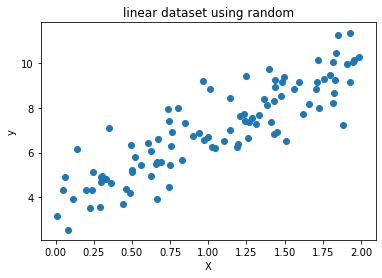

In [2]:
# show graph
%matplotlib inline
import matplotlib.pyplot as plt

plt.scatter(X,y)
plt.title('linear dataset using random')
plt.xlabel('X')
plt.ylabel('y')
plt.show()

In [3]:
# now we calculate theta using normal equation
# normal equation is mathematical equation for get result directly
# theta = (X.T * X)^-1 *X.T*y
# this theta is minimized cost function

X_b = np.c_[np.ones((100, 1)),X] # this make bias
theta_best = np.linalg.inv(X_b.T.dot(X_b)).dot(X_b.T).dot(y)

In [4]:
# our equation is y = 4x + 3 + norm_error
# below result is calulated by norm equation
# we can show theta is similar (4:3.944),(3,2.913)
# why it is not same (because we use gause norm error)
theta_best

array([[3.82889408],
       [3.06462557]])

In [5]:
# we use theta_best to predict

X_new = np.array([[0],[2]])
X_new_b = np.c_[np.ones((2,1)), X_new] # bias
y_pred = X_new_b.dot(theta_best)
y_pred

array([[3.82889408],
       [9.95814522]])

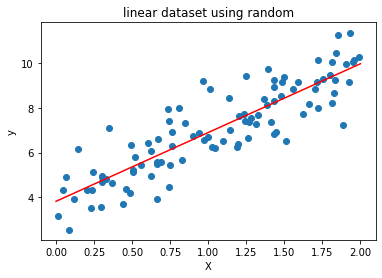

In [6]:
# show graph
%matplotlib inline

plt.scatter(X, y)
plt.plot(X_new, y_pred,'r-',label='predict')
plt.title('linear dataset using random')
plt.xlabel('X')
plt.ylabel('y')
plt.show()

In [7]:
# in sklearn, we can use linear regression easily
from sklearn.linear_model import LinearRegression

lin_reg = LinearRegression()
lin_reg.fit(X,y)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [8]:
# intercept_ is bias and coef_ is weight

lin_reg.intercept_, lin_reg.coef_

(array([3.82889408]), array([[3.06462557]]))

In [9]:
lin_reg.predict(X_new)

array([[3.82889408],
       [9.95814522]])

In [10]:
# Linear regression class is based on scipy.linalg.lstsq() (least squares)

theta_best_svd, residuals, rank, s = np.linalg.lstsq(X_b,y, rcond=1e-6)
theta_best_svd, residuals, rank, s 

(array([[3.82889408],
        [3.06462557]]),
 array([93.06243476]),
 2,
 array([15.10167253,  3.76542835]))

In [11]:
# this function calculate theta_hat = X^+ y
# X^+ is X's pseudoinverse(Moore-Penrose inverse matrix)
# we can get pseudoinverse by use np.linalg.pinv()
# pseudoinverse is calculated by SVD(singular value decomposition)

np.linalg.pinv(X_b).dot(y)

array([[3.82889408],
       [3.06462557]])

In [12]:
# batch gradient descent
learning_rate = 0.1
n_iterations = 1000
m = 100

theta = np.random.randn(2,1)

for iteration in range(n_iterations):
    gradients = 2/m * X_b.T.dot(X_b.dot(theta) - y)
    theta -= (learning_rate * gradients)

In [13]:
theta

array([[3.82889408],
       [3.06462557]])

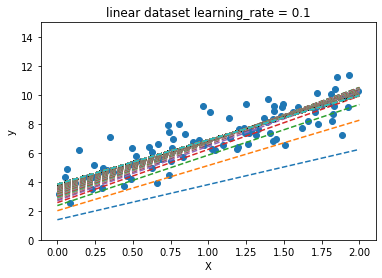

In [14]:
%matplotlib inline
# to compare learning rate by graph
def draw_graph(theta):
    y_pred = X_new_b.dot(theta)
    plt.plot(X_new, y_pred,'--')

theta = np.random.randn(2,1)

for iteration in range(n_iterations):
    gradients = 2/m * X_b.T.dot(X_b.dot(theta) - y)
    theta -= (0.1 * gradients)
    draw_graph(theta)

plt.scatter(X, y)
plt.title('linear dataset learning_rate = 0.1')
plt.xlabel('X')
plt.ylabel('y')
plt.ylim((0,15))
plt.show()

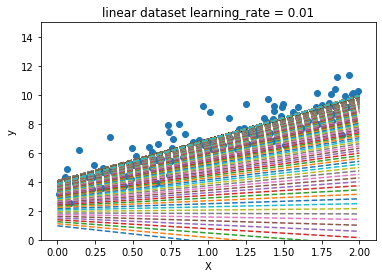

In [15]:
%matplotlib inline
# to compare learning rate by graph
def draw_graph(theta):
    y_pred = X_new_b.dot(theta)
    plt.plot(X_new, y_pred,'--')

theta = np.random.randn(2,1)

for iteration in range(n_iterations):
    gradients = 2/m * X_b.T.dot(X_b.dot(theta) - y)
    theta -= (0.01 * gradients)
    draw_graph(theta)

plt.scatter(X, y)
plt.title('linear dataset learning_rate = 0.01')
plt.xlabel('X')
plt.ylabel('y')
plt.ylim((0,15))
plt.show()

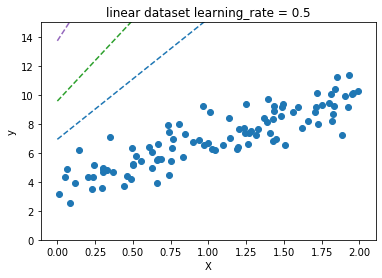

In [16]:
%matplotlib inline
# to compare learning rate by graph
def draw_graph(theta):
    y_pred = X_new_b.dot(theta)
    plt.plot(X_new, y_pred,'--')

theta = np.random.randn(2,1)

for iteration in range(n_iterations):
    gradients = 2/m * X_b.T.dot(X_b.dot(theta) - y)
    theta -= (0.5 * gradients)
    draw_graph(theta)

plt.scatter(X, y)
plt.title('linear dataset learning_rate = 0.5')
plt.xlabel('X')
plt.ylabel('y')
plt.ylim((0,15))
plt.show()

In [17]:
theta

array([[-7.77386878e+107],
       [-9.49612996e+107]])

In [18]:
# sgd(Stochastic Gradient Descent)

n_epochs = 50
t0, t1 = 5, 50 # learning schedule hyperparameter

def learning_schedule(t):
    return t0 / (t+t1)
theta = np.random.randn(2,1)

m = len(X_b)
for epoch in range(n_epochs):
    for i in range(m):
        random_idx = np.random.randint(m)
        xi = X_b[random_idx:random_idx+1]
        yi = y[random_idx:random_idx+1]
        gradients = 2* xi.T.dot(xi.dot(theta)-yi)
        eta = learning_schedule(epoch * m + i)
        theta -= (eta * gradients)


In [19]:
theta

array([[3.83548895],
       [3.09908037]])

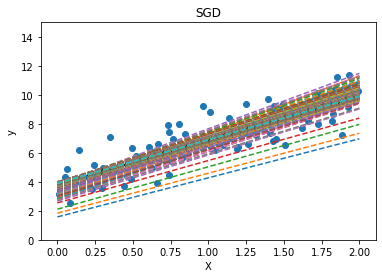

In [20]:
%matplotlib inline
# to compare learning rate by graph
def draw_graph(theta):
    y_pred = X_new_b.dot(theta)
    plt.plot(X_new, y_pred,'--')

theta = np.random.randn(2,1)

for epoch in range(n_epochs):
    for i in range(m):
        random_idx = np.random.randint(m)
        xi = X_b[random_idx:random_idx+1]
        yi = y[random_idx:random_idx+1]
        gradients = 2* xi.T.dot(xi.dot(theta)-yi)
        eta = learning_schedule(epoch * m + i)
        theta -= (eta * gradients)
        draw_graph(theta)

plt.scatter(X, y)
plt.title('SGD')
plt.xlabel('X')
plt.ylabel('y')
plt.ylim((0,15))
plt.show()

In [21]:
# sgd in sklearn

from sklearn.linear_model import SGDRegressor
sgd_reg = SGDRegressor(max_iter=1000, tol=1e-3, penalty=None, eta0=0.1)
sgd_reg.fit(X,y.ravel())

SGDRegressor(alpha=0.0001, average=False, early_stopping=False, epsilon=0.1,
             eta0=0.1, fit_intercept=True, l1_ratio=0.15,
             learning_rate='invscaling', loss='squared_loss', max_iter=1000,
             n_iter_no_change=5, penalty=None, power_t=0.25, random_state=None,
             shuffle=True, tol=0.001, validation_fraction=0.1, verbose=0,
             warm_start=False)

In [22]:
sgd_reg.intercept_, sgd_reg.coef_

(array([3.81153687]), array([3.0717985]))

In [23]:
# pollynomial regression

# first of all we have to make non-linear data bu quandratic equation

m = 100
X = 6 * np.random.rand(m, 1) - 3
y = 0.5 * X**2 + X + 2 + np.random.randn(m,1)

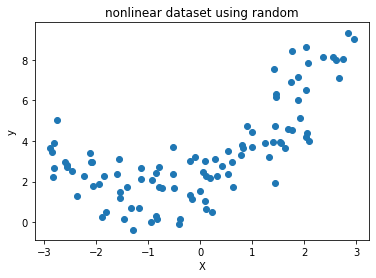

In [24]:
# show graph
%matplotlib inline


plt.scatter(X,y)
plt.title('nonlinear dataset using random')
plt.xlabel('X')
plt.ylabel('y')
plt.show()

In [25]:
# we use sklearn polynomial feature to convert training data

from sklearn.preprocessing import PolynomialFeatures

poly_features = PolynomialFeatures(degree=2, include_bias=False)
X_poly = poly_features.fit_transform(X)


In [26]:
X[0], X_poly[0]

(array([-2.7991471]), array([-2.7991471 ,  7.83522446]))

In [27]:
# apply in linear regression
lin_reg = LinearRegression()
lin_reg.fit(X_poly, y)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [28]:
lin_reg.intercept_, lin_reg.coef_

(array([2.00325799]), array([[1.02511551, 0.51458432]]))

In [29]:
lin_reg_linear = LinearRegression()
lin_reg_linear.fit(X, y)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

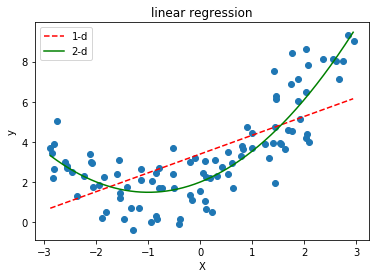

In [30]:
# show graph
# when many feature, we can find relation between feature by using polynomial regression 
# but if we use high dimension regression it occur overfitting
%matplotlib inline

X_new = np.arange(X.min(),X.max(),0.01)
y_pred_linear = lin_reg_linear.predict(X_new.reshape(len(X_new),1))
X_new_poly = poly_features.fit_transform(X_new.reshape(len(X_new),1))
y_pred_poly = lin_reg.predict(X_new_poly)

plt.scatter(X, y)
plt.plot(X_new, y_pred_linear,'r--',label='1-d')
plt.plot(X_new, y_pred_poly,'g-',label='2-d')
plt.title('linear regression')
plt.xlabel('X')
plt.ylabel('y')
plt.legend()
plt.show()

In [31]:
# how can we know model occur overfitting or underfitting
# first using k-fold cross validation
# another is draw learning curve
# to draw learning curve, we only train model many times by subset which have another size
# below is learning curve draw 

from sklearn.metrics import mean_squared_error
from sklearn.model_selection import train_test_split

def plot_learning_curves(model, X, y):
    X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=.2)
    train_errors, val_errors =[], []
    for m in range(1, len(X_train)):
        model.fit(X_train[:m], y_train[:m])
        y_train_pred = model.predict(X_train[:m])
        y_val_pred = model.predict(X_val)
        train_errors.append(mean_squared_error(y_train[:m], y_train_pred))
        val_errors.append(mean_squared_error(y_val,y_val_pred))
    plt.plot(np.sqrt(train_errors), 'r-+', linewidth=2, label='train_set')
    plt.plot(np.sqrt(val_errors), 'b-', linewidth=3, label='test_set')
    plt.legend()
    plt.ylim((0,3))
    plt.show()


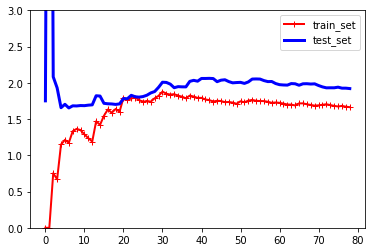

In [32]:
%matplotlib inline
lin_reg = LinearRegression()
plot_learning_curves(lin_reg,X,y)

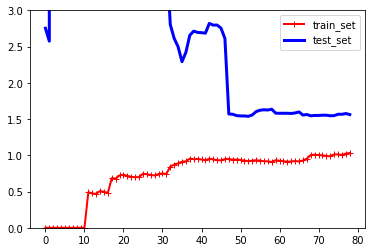

In [33]:
# 10 dimension
from sklearn.pipeline import Pipeline

polynomial_reg = Pipeline([
    ('poly_features', PolynomialFeatures(degree=10, include_bias=False)),
    ('lin_reg', LinearRegression()),
])
plot_learning_curves(polynomial_reg, X, y)

In [34]:
# to reduce overfitting, best is regulation about model
# linear regression model usually regulated by limited weights.

# ridge regression(tikhonov regulation)
# if alpha is 0 then it is same with linear regression
# fist we make dataset
np.random.seed(42)
m = 20
X = 3 * np.random.rand(m, 1)
y = 1 + 0.5 * X + np.random.randn(m, 1) / 1.5
X_new = np.linspace(0, 3, 100).reshape(100, 1)

In [35]:
# below is ridge regression by normal equation

from sklearn.linear_model import Ridge
ridge_reg = Ridge(alpha=1, solver="cholesky", random_state=42)
ridge_reg.fit(X, y)
ridge_reg.predict([[1.5]])

array([[1.55071465]])

In [36]:
# below is ridge regression by using sgd

sgd_reg = SGDRegressor(penalty="l2", random_state=42)
sgd_reg.fit(X, y.ravel())
sgd_reg.predict([[1.5]])

array([1.47012588])

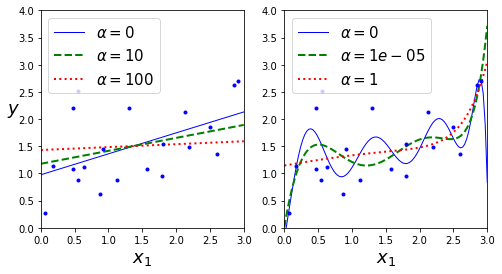

In [37]:
from sklearn.linear_model import Ridge
from sklearn.preprocessing import StandardScaler

def plot_model(model_class, polynomial, alphas, **model_kargs):
    for alpha, style in zip(alphas, ("b-", "g--", "r:")):
        model = model_class(alpha, **model_kargs) if alpha > 0 else LinearRegression()
        if polynomial:
            model = Pipeline([
                    ("poly_features", PolynomialFeatures(degree=10, include_bias=False)),
                    ("std_scaler", StandardScaler()),
                    ("regul_reg", model),
                ])
        model.fit(X, y)
        y_new_regul = model.predict(X_new)
        lw = 2 if alpha > 0 else 1
        plt.plot(X_new, y_new_regul, style, linewidth=lw, label=r"$\alpha = {}$".format(alpha))
    plt.plot(X, y, "b.", linewidth=3)
    plt.legend(loc="upper left", fontsize=15)
    plt.xlabel("$x_1$", fontsize=18)
    plt.axis([0, 3, 0, 4])

plt.figure(figsize=(8,4))
plt.subplot(121)
plot_model(Ridge, polynomial=False, alphas=(0, 10, 100), random_state=42)
plt.ylabel("$y$", rotation=0, fontsize=18)
plt.subplot(122)
plot_model(Ridge, polynomial=True, alphas=(0, 10**-5, 1), random_state=42)

plt.show()

/Users/h/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/coordinate_descent.py:475: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 2.802867703827423, tolerance: 0.0009294783355207351
  positive)


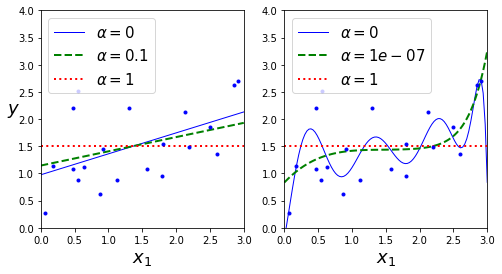

In [38]:
# Lasso regression(least absolute shirnkage and selection operator)
# it is same with ridge in adding regulation
# but in lasso weights l1 norm instead of l2 norm power
from sklearn.linear_model import Lasso

plt.figure(figsize=(8,4))
plt.subplot(121)
plot_model(Lasso, polynomial=False, alphas=(0, 0.1, 1), random_state=42)
plt.ylabel("$y$", rotation=0, fontsize=18)
plt.subplot(122)
plot_model(Lasso, polynomial=True, alphas=(0, 10**-7, 1), random_state=42)
plt.show()

In [39]:
from sklearn.linear_model import Lasso
lasso_reg = Lasso(alpha=0.1)
lasso_reg.fit(X, y)
lasso_reg.predict([[1.5]])

array([1.53788174])

In [40]:
# below is ridge regression by using sgd

sgd_reg = SGDRegressor(penalty="l1", random_state=42)
sgd_reg.fit(X, y.ravel())
sgd_reg.predict([[1.5]])

array([1.47011206])

In [41]:
# elasticnet is an eclectic model lasso and ridge
# if r=0 then ridge elif r=1 then lasso
# Generally, we avoid normal linear regression
# ridge is basic, but if feature num is little then we us lasso or elasticnet

from sklearn.linear_model import ElasticNet
elastic_net = ElasticNet(alpha=0.1, l1_ratio=0.5, random_state=42)
elastic_net.fit(X, y)
elastic_net.predict([[1.5]])

array([1.54333232])

In [42]:
# early stopping
np.random.seed(42)
m = 100
X = 6 * np.random.rand(m, 1) - 3
y = 2 + X + 0.5 * X**2 + np.random.randn(m, 1)

X_train, X_val, y_train, y_val = train_test_split(X[:50], y[:50].ravel(), test_size=0.5, random_state=10)

In [44]:
from sklearn.base import clone
poly_scaler = Pipeline([
    ('poly_features', PolynomialFeatures(degree=90, include_bias=False)),
    ('std_scaler', StandardScaler())
])
X_train_poly_scaled = poly_scaler.fit_transform(X_train)
X_val_poly_scaled = poly_scaler.transform(X_val)

# if warm_start = True then when fit() method called, keep going train at prev model parameter, not start at first
sgd_reg = SGDRegressor(max_iter=1, tol=-np.infty, warm_start=True,
                      penalty=None, learning_rate='constant', eta0=0.0005)

minimum_val_error = float('inf')
best_epoch, best_model = None, None
for epoch in range(1000):
    sgd_reg.fit(X_train_poly_scaled, y_train)
    y_val_predict = sgd_reg.predict(X_val_poly_scaled)
    val_error = mean_squared_error(y_val, y_val_predict)
    if val_error < minimum_val_error:
        minimum_val_error = val_error
        best_epoch = epoch
        best_model = clone(sgd_reg)

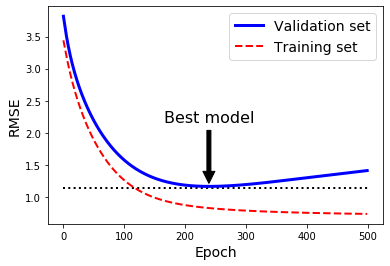

In [46]:
sgd_reg = SGDRegressor(max_iter=1, tol=-np.infty, warm_start=True,
                       penalty=None, learning_rate="constant", eta0=0.0005, random_state=42)

n_epochs = 500
train_errors, val_errors = [], []
for epoch in range(n_epochs):
    sgd_reg.fit(X_train_poly_scaled, y_train)
    y_train_predict = sgd_reg.predict(X_train_poly_scaled)
    y_val_predict = sgd_reg.predict(X_val_poly_scaled)
    train_errors.append(mean_squared_error(y_train, y_train_predict))
    val_errors.append(mean_squared_error(y_val, y_val_predict))

best_epoch = np.argmin(val_errors)
best_val_rmse = np.sqrt(val_errors[best_epoch])

plt.annotate('Best model',
             xy=(best_epoch, best_val_rmse),
             xytext=(best_epoch, best_val_rmse + 1),
             ha="center",
             arrowprops=dict(facecolor='black', shrink=0.05),
             fontsize=16,
            )

best_val_rmse -= 0.03  # just to make the graph look better
plt.plot([0, n_epochs], [best_val_rmse, best_val_rmse], "k:", linewidth=2)
plt.plot(np.sqrt(val_errors), "b-", linewidth=3, label="Validation set")
plt.plot(np.sqrt(train_errors), "r--", linewidth=2, label="Training set")
plt.legend(loc="upper right", fontsize=14)
plt.xlabel("Epoch", fontsize=14)
plt.ylabel("RMSE", fontsize=14)
plt.show()

In [47]:
# logistic regression

# some regression algorithm can use in classification
# logistic regression usually use in calculation prob that a sample belongs to a characteristic
# first of all we call dataset iris
from sklearn import datasets

iris = datasets.load_iris()
list(iris.keys())

['data', 'target', 'target_names', 'DESCR', 'feature_names', 'filename']

In [48]:
X = iris['data'][:,3:]
y = (iris['target']==2).astype(np.int)

In [49]:
# training logistic regression
from sklearn.linear_model import LogisticRegression

log_reg = LogisticRegression()
log_reg.fit(X,y)

/Users/h/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='warn', n_jobs=None, penalty='l2',
                   random_state=None, solver='warn', tol=0.0001, verbose=0,
                   warm_start=False)

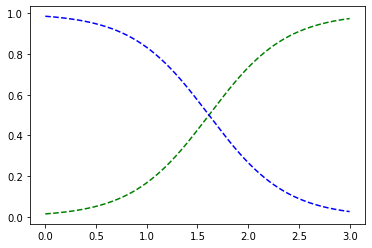

In [53]:
X_new = np.linspace(0, 3, 1000).reshape(-1,1)
y_proba = log_reg.predict_proba(X_new)
plt.plot(X_new, y_proba[:, 1], 'g--', label='iris virginica')
plt.plot(X_new, y_proba[:, 0], 'b--', label='not iris virginica')


In [54]:
log_reg.predict([[1.7],[1.5]])

array([1, 0])

In [55]:
# softmax regression
# in logistic don't  connect many binary classification , support multi class directly
# it calls softmax regression or multinomial logistic regression

X = iris['data'][:,(2,3)]
y = iris['target']

softmax_reg = LogisticRegression(multi_class='multinomial', solver='lbfgs', C=10)
softmax_reg.fit(X,y)

LogisticRegression(C=10, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='multinomial', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

In [56]:
softmax_reg.predict([[5,2]])

array([2])

In [59]:
softmax_reg.predict_proba([[5,2]])

array([[6.38014896e-07, 5.74929995e-02, 9.42506362e-01]])

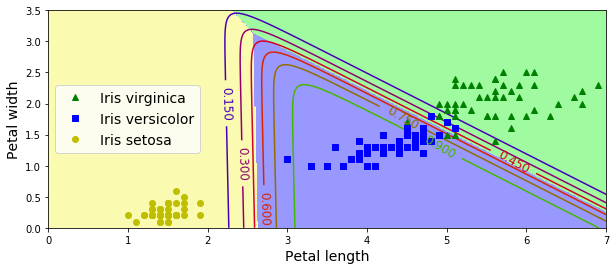

In [61]:
x0, x1 = np.meshgrid(
        np.linspace(0, 8, 500).reshape(-1, 1),
        np.linspace(0, 3.5, 200).reshape(-1, 1),
    )
X_new = np.c_[x0.ravel(), x1.ravel()]


y_proba = softmax_reg.predict_proba(X_new)
y_predict = softmax_reg.predict(X_new)

zz1 = y_proba[:, 1].reshape(x0.shape)
zz = y_predict.reshape(x0.shape)

plt.figure(figsize=(10, 4))
plt.plot(X[y==2, 0], X[y==2, 1], "g^", label="Iris virginica")
plt.plot(X[y==1, 0], X[y==1, 1], "bs", label="Iris versicolor")
plt.plot(X[y==0, 0], X[y==0, 1], "yo", label="Iris setosa")

from matplotlib.colors import ListedColormap
custom_cmap = ListedColormap(['#fafab0','#9898ff','#a0faa0'])

plt.contourf(x0, x1, zz, cmap=custom_cmap)
contour = plt.contour(x0, x1, zz1, cmap=plt.cm.brg)
plt.clabel(contour, inline=1, fontsize=12)
plt.xlabel("Petal length", fontsize=14)
plt.ylabel("Petal width", fontsize=14)
plt.legend(loc="center left", fontsize=14)
plt.axis([0, 7, 0, 3.5])
plt.show()